# Visualization for General Public: Supply Chain Greenhouse Gas Emissions by Sector

## Imports

In [157]:
import matplotlib.pyplot as plt
import pandas as pd

## 1. Read Dataset

In [158]:
emissions_df = pd.read_csv('./SupplyChainGHGEmissionFactors_v1.2_NAICS_CO2e_USD2021.csv')

## 2. Get NAICS Codes by Sector (first digit)

In [159]:
regex_1 = '^1.*$'
regex_2 = '^2.*$'
regex_3 = '^3.*$'
regex_4 = '^4.*$'
regex_5 = '^5.*$'
regex_6 = '^6.*$'
regex_7 = '^7.*$'
regex_8 = '^8.*$'
regex_9 = '^9.*$'

strings = emissions_df["2017 NAICS Code"].astype("string")

grouped_1 = strings.str.findall(regex_1)
grouped_2 = strings.str.findall(regex_2)
grouped_3 = strings.str.findall(regex_3)
grouped_4 = strings.str.findall(regex_4)
grouped_5 = strings.str.findall(regex_5)
grouped_6 = strings.str.findall(regex_6)
grouped_7 = strings.str.findall(regex_7)
grouped_8 = strings.str.findall(regex_8)
grouped_9 = strings.str.findall(regex_9)

# Agricultural (11) 
agriculture = []
for item in grouped_1:
    if item != []:
        agriculture.append(item)

# Mining, Utilities, Construction (21, 22, 23)
mining = []
for item in grouped_2:
    if item != []:
        mining.append(item)
        
# Manufacturing (31, 32, 33)
manuf = []
for item in grouped_3:
    if item != []:
        manuf.append(item)
        
# Trade (42, 44, 45, 48, 49)
trade = []
for item in grouped_4:
    if item != []:
        trade.append(item)
        
# Finance and Services (51, 52, 53, 54, 55, 56)
finserv = []
for item in grouped_5:
    if item != []:
        finserv.append(item)
        
# Social Services (Education, Health Care) (61, 62)
social = []
for item in grouped_6:
    if item != []:
        social.append(item)
        
# Arts and Food Services (71, 72)
arts = []
for item in grouped_7:
    if item != []:
        arts.append(item)
        
# Other except Public Administration (81)
other = []
for item in grouped_8:
    if item != []:
        other.append(item)
        
# Public Administration
public = []
for item in grouped_9:
    if item != []:
        public.append(item)

## Set up Data for Plotting

In [160]:
naics_categories = ["Agricultural (" + str(len(agriculture)) + ")", 
                    "Resources/Construction (" + str(len(mining)) + ")", 
                    "Manufacturing (" + str(len(manuf)) + ")", 
                    "Trade (" + str(len(trade)) + ")",
                    "Business Services (" + str(len(finserv)) + ")",
                    "Social Services (" + str(len(social)) + ")",
                    "Arts (" + str(len(arts)) + ")",
                    "Other (" + str(len(other)) + ")"]

# Allows us to use loc to extract each group
sizes = [len(agriculture),len(mining),len(manuf),len(trade),len(finserv),len(social),len(arts),len(other)]

distance = 0
# 1
df_agr = emissions_df.loc[0:sizes[0]-1]
agr_mean = df_agr["Supply Chain Emission Factors with Margins"].mean()
agr_std = df_agr["Supply Chain Emission Factors with Margins"].std()
distance += sizes[0]

# 2
df_min = emissions_df.loc[distance:(distance + sizes[1]-1)]
min_mean = df_min["Supply Chain Emission Factors with Margins"].mean()
min_std = df_min["Supply Chain Emission Factors with Margins"].std()
distance += sizes[1]

# 3
df_mfc = emissions_df.loc[distance:(distance + sizes[2]-1)]
mfc_mean = df_mfc["Supply Chain Emission Factors with Margins"].mean()
mfc_std = df_mfc["Supply Chain Emission Factors with Margins"].std()
distance += sizes[2]

#4
df_tra = emissions_df.loc[distance:(distance + sizes[3]-1)]
tra_mean = df_tra["Supply Chain Emission Factors with Margins"].mean()
tra_std = df_tra["Supply Chain Emission Factors with Margins"].std()
distance += sizes[3]

# 5
df_ser = emissions_df.loc[distance:(distance + sizes[4]-1)]
ser_mean = df_ser["Supply Chain Emission Factors with Margins"].mean()
ser_std = df_ser["Supply Chain Emission Factors with Margins"].std()
distance += sizes[4]

# 6
df_soc = emissions_df.loc[distance:(distance + sizes[5]-1)]
soc_mean = df_soc["Supply Chain Emission Factors with Margins"].mean()
soc_std = df_soc["Supply Chain Emission Factors with Margins"].std()
distance += sizes[5]

# 7
df_art = emissions_df.loc[distance:(distance + sizes[6]-1)]
art_mean = df_art["Supply Chain Emission Factors with Margins"].mean()
art_std = df_art["Supply Chain Emission Factors with Margins"].std()
distance += sizes[6]

# 8
df_oth = emissions_df.loc[distance:(distance + sizes[7]-1)]
oth_mean = df_oth["Supply Chain Emission Factors with Margins"].mean()
oth_std = df_oth["Supply Chain Emission Factors with Margins"].std()

means = [agr_mean, min_mean, mfc_mean, tra_mean, ser_mean, soc_mean, art_mean, oth_mean]
std_array = [agr_std, min_std, mfc_std, tra_std, ser_std, soc_std, art_std, oth_std]

# Visualization

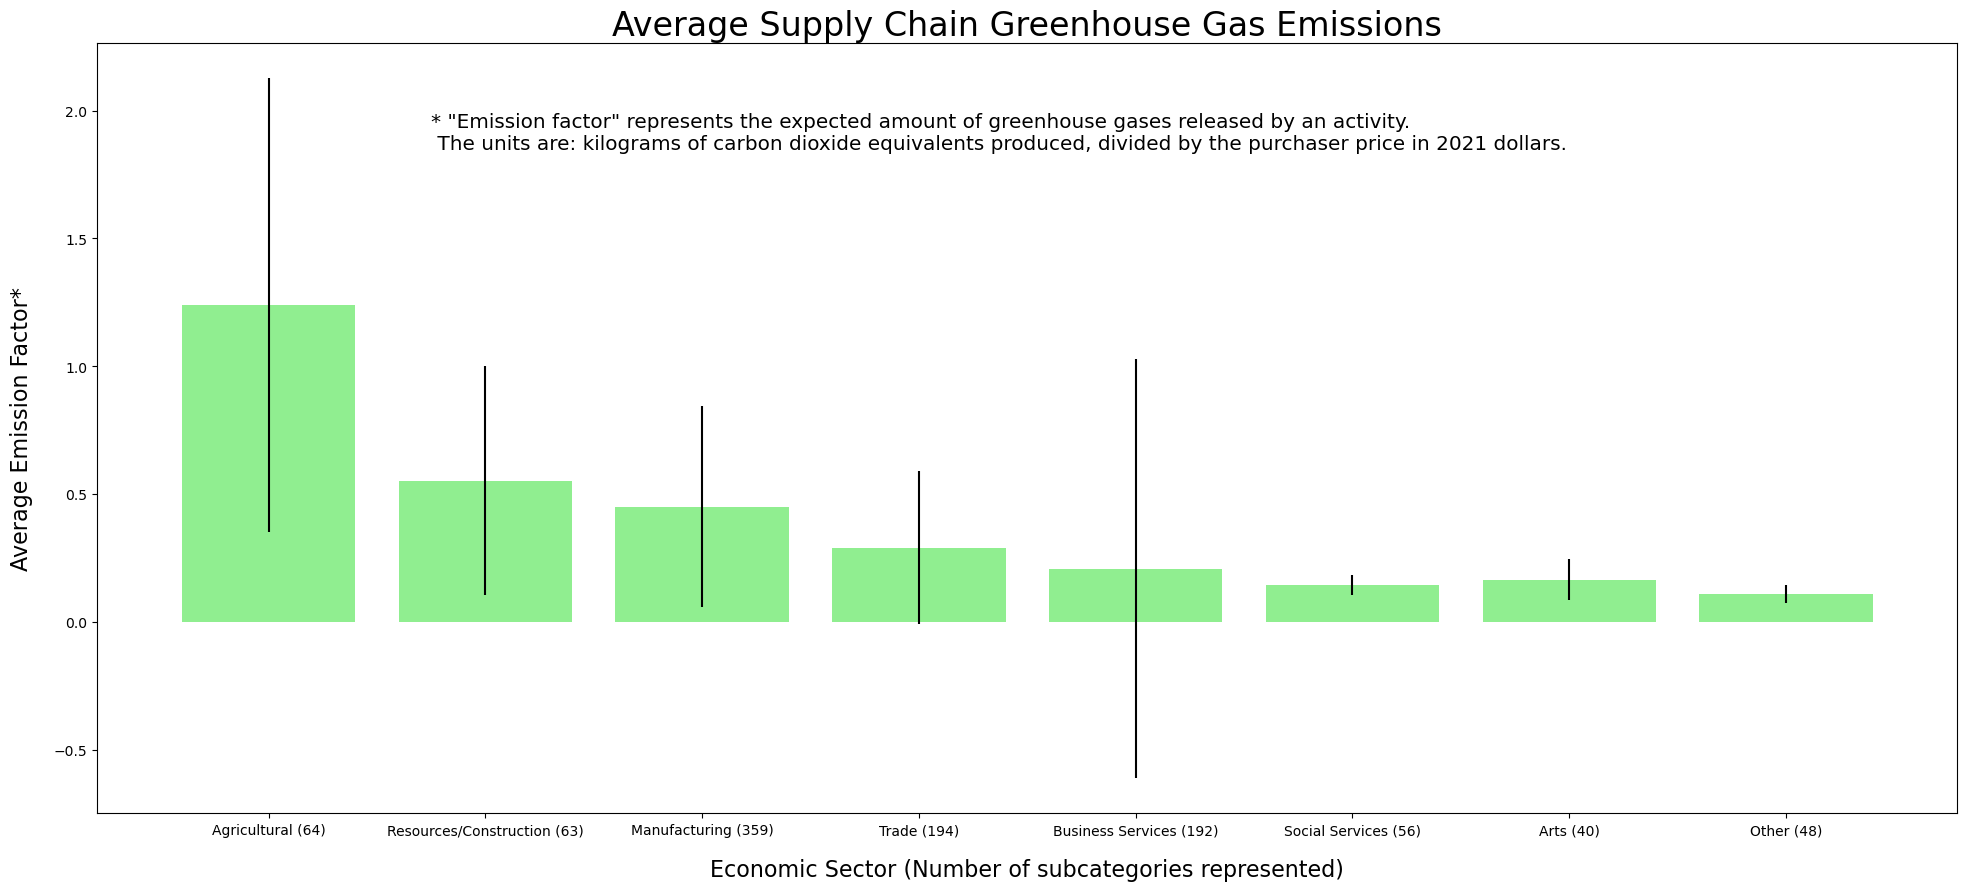

In [162]:
plt.figure(figsize=(24,10))
plt.title("Average Supply Chain Greenhouse Gas Emissions", size=24)
plt.xlabel("Economic Sector (Number of subcategories represented)", size=16, labelpad=15)
plt.ylabel("Average Emission Factor*", size=16, labelpad=15)


box_text = "* \"Emission factor\" represents the expected amount of greenhouse gases released by an activity.\n The units are: kilograms of carbon dioxide equivalents produced, divided by the purchaser price in 2021 dollars."
plt.text(0.75,1.85, s=box_text,color="black", backgroundcolor="white",fontsize='x-large')

plt.bar(naics_categories,means, yerr=std_array, color="lightgreen")
plt.show()